<a href="https://colab.research.google.com/github/tubulsapir/Private/blob/main/Regression_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Regression***

In this exercise the network task will be to approximate the following target function:

$f(x_1,x_2) = x_1 \cdot exp(-x_1^2-x_2^2)$

**Generate Training and Test Data**

Plot the Target Function

In [1]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

X = np.random.uniform(low=-2, high=2, size=(2,1000))
Z = X[0,:]*np.exp(-X[0,:]**2-X[1,:]**2)


In [2]:
def plotFunction(X,Z,title):
  fig = plt.figure()
  ax = fig.add_subplot(projection='3d') #plot scatter
  ax.scatter(X[0,:],X[1,:],Z,c=Z, cmap='viridis', linewidth=0.5) #plot scatter
  # ax = plt.axes(projection='3d') #plot trisurf
  # ax.plot_trisurf(X[0,:], X[1,:], Z, cmap='viridis', edgecolor='none') #plot trisurf
  ax.set_title(title)
  ax.set_xlabel("X1")
  ax.set_ylabel("X2")
  ax.set_zlabel("Z")
  plt.show()

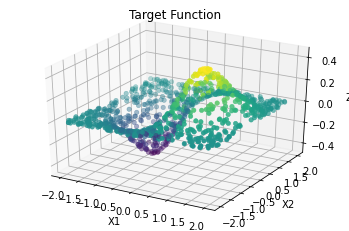

In [3]:
plotFunction(X,Z,"Target Function")

Generate the Training Set

In [4]:
Ntrain = 500
X_train = np.random.uniform(low=-2, high=2, size=(2,Ntrain))

Generate the Test Set

In [5]:
Ntest = 200
X_test = np.random.uniform(low=-2, high=2, size=(2,Ntest))

Evaluate Training Set

In [6]:
Y_train = X_train[0,:]*np.exp(-X_train[0,:]**2-X_train[1,:]**2)

**Train the DNN**

In order to approximate the above function, we will use the following network architecture:
1. Two inputs.
2. Four neurons in the first hidden layer.
3. Three neurons in the second hidden layer.
4. One linear output.
The network structure is shown in the following diagram:


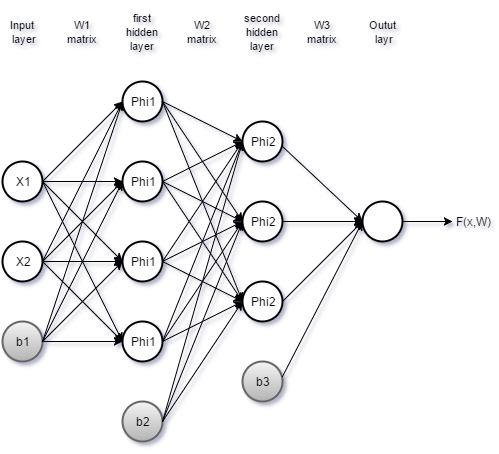

we can also represent the above feed forward neural network with the following algebraic equation:

$𝐹(𝑥,𝑊_1,𝑊_2,𝑊_3,𝑏_1,𝑏_2,𝑏_3)=𝑊_3^𝑇 \cdot \varphi_2(𝑊_2^𝑇 \cdot \varphi_1(𝑊_1^𝑇 \cdot 𝑥+𝑏1)+𝑏2)+𝑏3$

Where: 

$𝑥\in ℝ^2$

$𝑊_1∈ℝ^{2×4}$ 

$𝑊_2∈ℝ^{4×3}$

$𝑊_3∈ℝ^{3×1}$

$𝑏_1∈ℝ^4$

$𝑏_2∈ℝ^3$

$𝑏_3∈ℝ$

$\varphi_1(x) = \varphi_2(x) = tanh(x)$

Initialize starting node $\theta_0$

In [7]:
W1 = np.random.randn(2,4)/np.sqrt(2)
W2 = np.random.randn(4,3)/np.sqrt(4)
W3 = np.random.randn(3,1)/np.sqrt(3)
b1 = np.zeros((4,1))
b2 = np.zeros((3,1))
b3 = np.zeros((1,1))

def weightsToTheta(W1,W2,W3,b1,b2,b3):
  theta = np.concatenate((W1.reshape((-1, 1)),W2.reshape((-1, 1))), axis=0)
  theta = np.concatenate((theta,W3.reshape((-1, 1))), axis=0)
  theta = np.concatenate((theta,b1.reshape((-1, 1))), axis=0)
  theta = np.concatenate((theta,b2.reshape((-1, 1))), axis=0)
  theta = np.concatenate((theta,b3.reshape((-1, 1))), axis=0)
  return theta

def thetaToWeights(theta):
  W1 = theta[0:8].reshape((2,4))
  W2 = theta[8:20].reshape((4,3))
  W3 = theta[20:23].reshape((3,1))
  b1 = theta[23:27].reshape((4,1))
  b2 = theta[27:30].reshape((3,1))
  b3 = theta[30].reshape((1,1))
  return W1,W2,W3,b1,b2,b3

theta0 = weightsToTheta(W1,W2,W3,b1,b2,b3)
print(theta0.shape)

(31, 1)


Objective function - MSE

In [8]:
import scipy.optimize as op

def tanh(z):
    return np.tanh(z)

def NeuralFunc(theta, x):
    W1,W2,W3,b1,b2,b3 = thetaToWeights(theta)
    term1 = np.matmul(W1.T,x)+b1
    term2 = np.matmul(W2.T,tanh(term1))+b2
    term3 = np.matmul(W3.T,tanh(term2))+b3
    return term3.reshape(-1,)

def CostFunc(theta,x,y):
    y_hat = NeuralFunc(theta, x)
    N = y.size
    loss = 1/N*np.sum((y_hat-y)**2)
    return loss

Result = op.minimize(fun=CostFunc, x0=theta0, args=(X_train, Y_train))

optimal_theta = Result.x

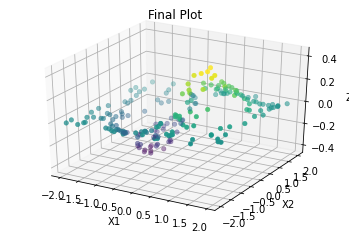

In [9]:
Y_test_predict = NeuralFunc(optimal_theta, X_test)
plotFunction(X_test,Y_test_predict,"Final Plot")